**Naive Bayes**

**Analise de Sentimentos**

In [4]:
# Importa a biblioteca NLTK para processamento de linguagem natural
import nltk

# Importa a biblioteca re para trabalhar com expressões regulares
import re

# Importa a biblioteca pandas para manipulação e análise de dados
import pandas as pd

# Importa CountVectorizer para converter texto em uma matriz de contagem de tokens
from sklearn.feature_extraction.text import CountVectorizer

# Importa o modelo Naive Bayes Multinomial para classificação
from sklearn.naive_bayes import MultinomialNB

# Importa a biblioteca metrics para avaliação de modelos
from sklearn import metrics

# Importa cross_val_predict para realizar validação cruzada e gerar previsões
from sklearn.model_selection import cross_val_predict

**Ler aqruivo de dados e conta a quantidade de linhas**

In [5]:
# Lê o arquivo CSV 'Tweets_Mg.csv' com codificação 'utf-8' e armazena os dados em um DataFrame chamado 'dataset'
dataset = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [8]:
# Define uma opção do pandas para exibir o conteúdo completo das colunas, sem truncar os textos
pd.set_option('display.max_colwidth', None)

# Exibe as 100 primeiras linhas da coluna 'Text' do DataFrame 'dataset'
dataset.Text.head(100)

0                                                              ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ
1                                                                                  � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf
2                                                                                 �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw
3                                                                                                                     ��� https://t.co/BnDsO34qK0
4                  ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5
                                                                         ...                                                                     
95                             #noticiasdorenan Uso de depósitos judiciais pelo governo tem nova polêmica em MG: O Banco… ht

**Exclui linhas duplicadas**

In [9]:
# Remove linhas duplicadas do DataFrame 'dataset' com base na coluna 'Text'
# O parâmetro 'inplace=True' garante que as alterações sejam feitas diretamente no DataFrame original
dataset.drop_duplicates(['Text'], inplace=True)

In [10]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

**Removendo coluna desnecessárias**

In [11]:
# Itera sobre os nomes das colunas do DataFrame 'dataset'
for i in dataset.columns.values:
    # Verifica se o nome da coluna começa com 'Unnamed'
    if i.startswith('Unnamed'):
        # Remove a coluna do DataFrame 'dataset'
        dataset.drop(i, axis=1, inplace=True)
        # Exibe o nome da coluna que foi deletada
        print('Colunas Deletadas:', i)

Colunas Deletadas: Unnamed: 0
Colunas Deletadas: Unnamed: 10
Colunas Deletadas: Unnamed: 11
Colunas Deletadas: Unnamed: 12
Colunas Deletadas: Unnamed: 13
Colunas Deletadas: Unnamed: 14
Colunas Deletadas: Unnamed: 15
Colunas Deletadas: Unnamed: 16
Colunas Deletadas: Unnamed: 17
Colunas Deletadas: Unnamed: 18
Colunas Deletadas: Unnamed: 19
Colunas Deletadas: Unnamed: 20
Colunas Deletadas: Unnamed: 21
Colunas Deletadas: Unnamed: 22
Colunas Deletadas: Unnamed: 23
Colunas Deletadas: Unnamed: 24


In [12]:
# Visualizando as colunas do dataset
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

**Distribuição das classes neutros, positivos e negativos**

<Axes: xlabel='Classificacao'>

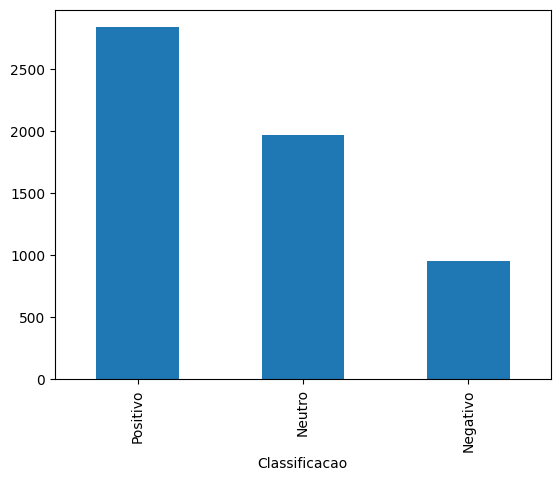

In [13]:
# Garante que os gráficos sejam exibidos diretamente no Jupyter Notebook
%matplotlib inline

# Conta a frequência de cada classe na coluna 'Classificacao' do DataFrame 'dataset'
# e gera um gráfico de barras para visualizar a distribuição das classes
dataset.Classificacao.value_counts().plot(kind='bar')

**Separando tweets e suas classes**

In [14]:
# Extrai a coluna 'Text' do DataFrame 'dataset' e a armazena na variável 'tweets'
tweets = dataset['Text']

# Extrai a coluna 'Classificacao' do DataFrame 'dataset' e a armazena na variável 'classes'
classes = dataset['Classificacao']

**Gerando o modelo**

In [15]:
# Cria um objeto CountVectorizer para transformar texto em uma matriz de contagem de palavras
# O parâmetro "analyzer='word'" indica que a análise será feita no nível de palavras
vectorizer = CountVectorizer(analyzer="word")

# Aplica o método fit_transform nos tweets para ajustar o vocabulário e transformar os textos em uma matriz esparsa
# Cada linha da matriz representa um tweet e cada coluna representa uma palavra única no vocabulário
freq_tweets = vectorizer.fit_transform(tweets)

In [16]:
# Verifica e exibe o tipo de dados do objeto 'freq_tweets', que é uma matriz de frequência de termos
type(freq_tweets)

scipy.sparse._csr.csr_matrix

In [17]:
# Exibe a forma (número de linhas e colunas) da matriz esparsa 'freq_tweets'
# As linhas representam os tweets e as colunas representam as palavras únicas no vocabulário
freq_tweets.shape

(5765, 13029)

In [20]:
# Converte a matriz esparsa 'freq_tweets' em uma matriz densa (numpy.ndarray)
# Nota: Isso pode consumir muita memória dependendo do tamanho da matriz
freq_tweets.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5765, 13029))

**Cria um modelo usando Naive Bayes multinomial**

In [21]:
# Cria um modelo de Naive Bayes Multinomial e o armazena na variável 'modelo'
modelo = MultinomialNB()

# Ajusta o modelo aos dados de treinamento
# 'freq_tweets' é a matriz de frequência de palavras (características) e 'classes' são os rótulos (classes alvo)
modelo.fit(freq_tweets, classes)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


**Testando o modelo com algumas instâncias simples**

In [22]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo esse ano',
          'O estado decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar']

In [23]:
# Transforma as instâncias de teste ('testes') em uma matriz de frequência de termos
# Usando o mesmo vocabulário e vetorizador ('vectorizer') que foi ajustado nos dados de treinamento
freq_testes = vectorizer.transform(testes)

In [24]:
# Para cada tweet de teste (t) e sua classificação prevista (c), faça:
for t, c in zip(testes, modelo.predict(freq_testes)):
    # Exibe o tweet seguido da classificação prevista, separados por uma vírgula
    print(t + ", " + c)

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo esse ano, Neutro
O estado decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro


In [ ]:
# Exibe as classes que o modelo foi treinado para prever
print(modelo.classes_)

# Calcula a probabilidade de cada instância de teste pertencer a cada classe
# A função predict_proba retorna uma matriz onde cada linha representa uma instância de teste
# e cada coluna representa a probabilidade da instância pertencer a uma classe específica
# O método round(2) arredonda os valores para duas casas decimais para facilitar a leitura
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.06, 0.94, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.1 , 0.89, 0.01]])